In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import glob

from fastai.vision import *
from fastai import *
import pandas as pd

import tarfile
import scipy.io
import numpy as np
import cv2 as cv
import os
import shutil
import random

from torchvision.models import *
from fastai.vision.models import *
from fastai.vision.learner import model_meta

import sys
import pretrainedmodels

In [7]:
path = Path('/home/amccarthy13/Documents/car-damage-dataset')

In [17]:
tfms = get_transforms(do_flip=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.2,
                      xtra_tfms=[brightness(change=(0.5*(1-0.1), 0.5*(1+0.1)), p=0.75),
                                 contrast(scale=(1-0.1, 1/(1-0.1)), p=0.75)])

data1 = ImageDataBunch.from_folder(path/'data2a','training','validation',ds_tfms=tfms, bs=64, size=512).normalize(imagenet_stats)

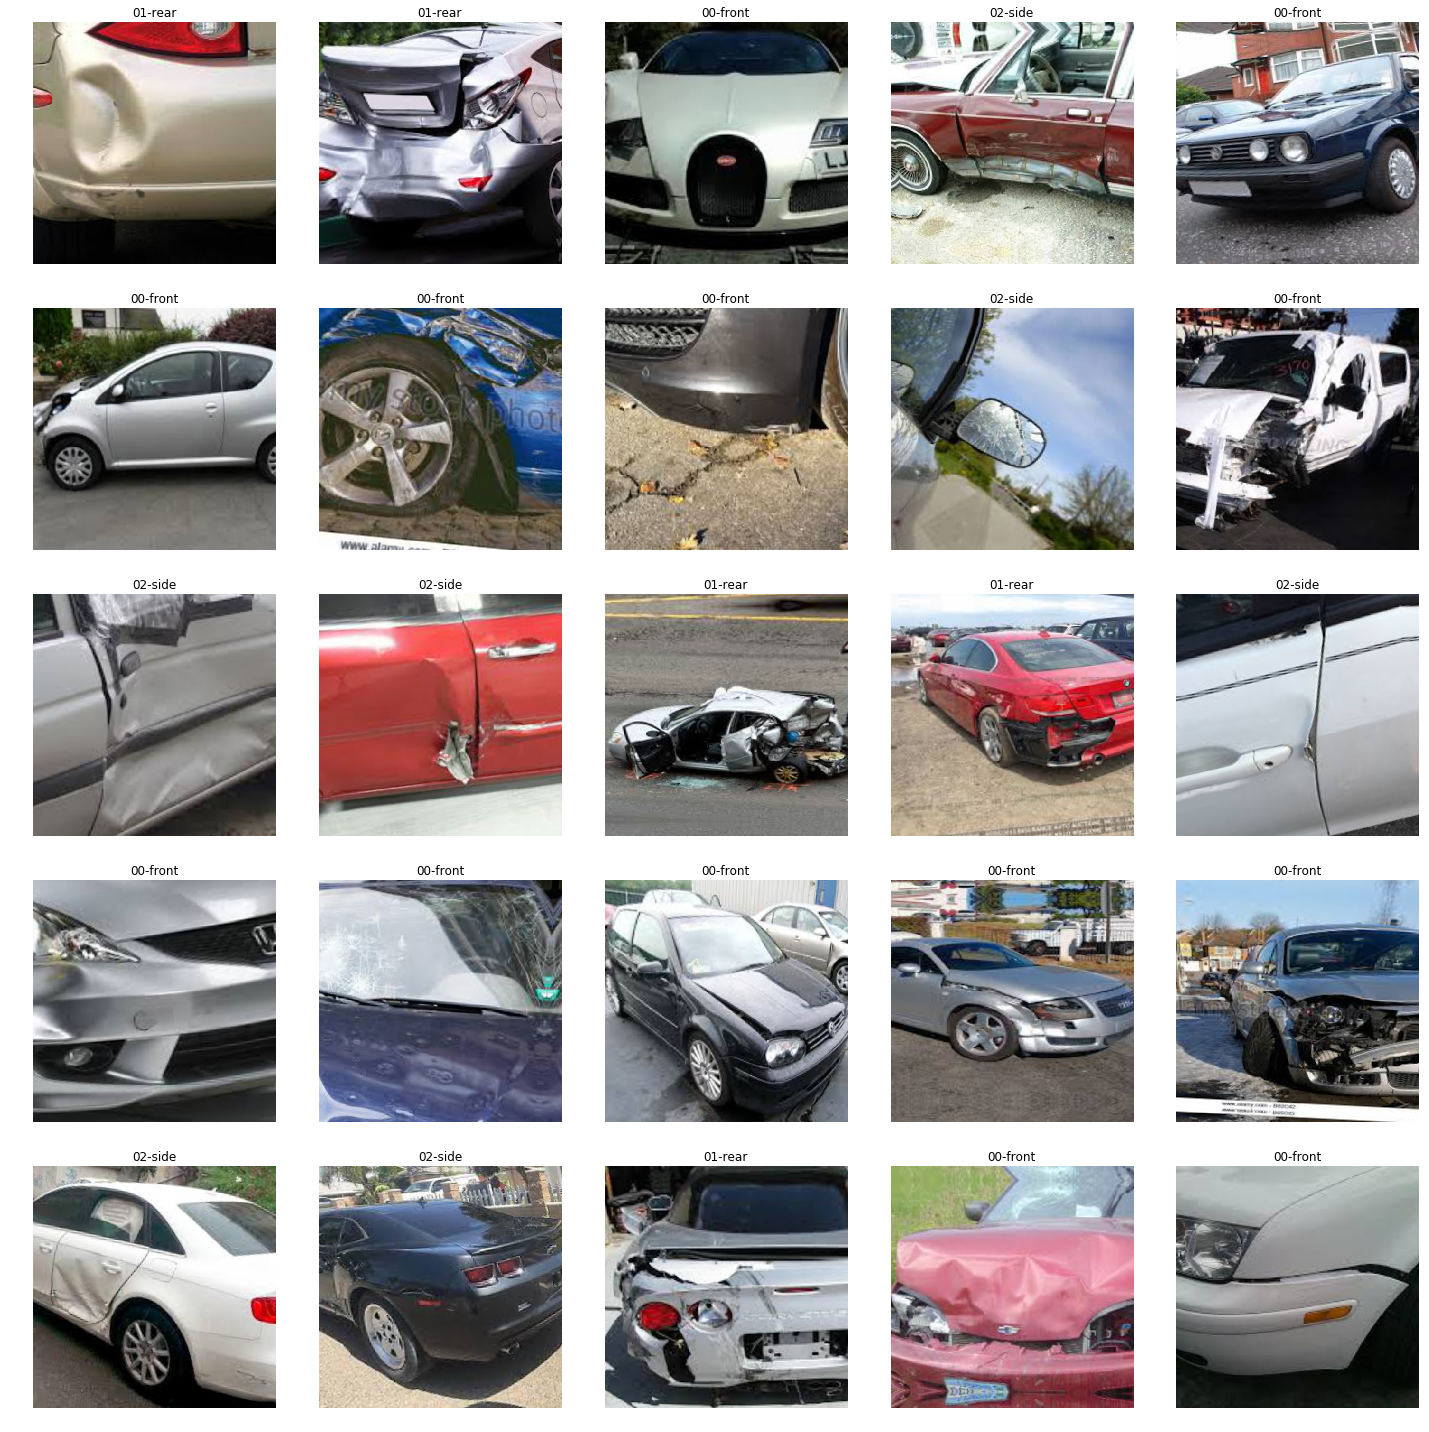

In [18]:
data1.show_batch()

In [15]:
print(len(data_notfms.classes))
print(data_notfms.classes)

3
['00-front', '01-rear', '02-side']


In [25]:
learn1 = create_cnn(data1, models.resnet34, pretrained=True, metrics=[error_rate, accuracy])
learn1.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


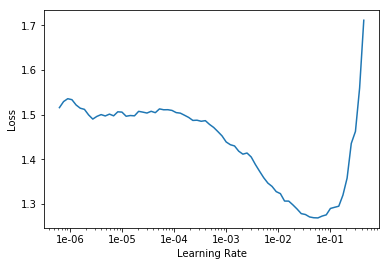

In [22]:
learn1.lr_find()
learn1.recorder.plot()

In [29]:
lr = 4.5e-3
learn1.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.694544,0.737601,0.321637,0.678363,00:14
2,0.618753,1.438251,0.461988,0.538012,00:14
3,0.595495,1.743605,0.397661,0.602339,00:14
4,0.572528,1.639253,0.339181,0.660819,00:13
5,0.514511,0.944144,0.356725,0.643275,00:14
6,0.430559,0.963326,0.251462,0.748538,00:14
7,0.359015,0.761574,0.280702,0.719298,00:14
8,0.287765,0.609463,0.198830,0.801170,00:14
9,0.230618,0.561660,0.204678,0.795322,00:14
10,0.185946,0.552725,0.198830,0.801170,00:13


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


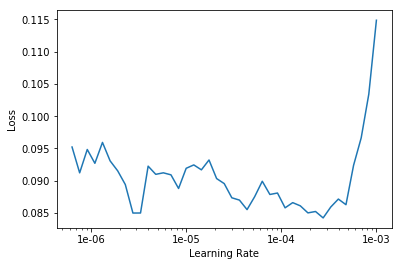

In [30]:
learn1.unfreeze()
learn1.lr_find()
learn1.recorder.plot()

In [32]:
learn1.fit_one_cycle(8, slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.059048,0.551581,0.192982,0.807018,00:13
2,0.065151,0.547601,0.187135,0.812865,00:13
3,0.067767,0.601831,0.222222,0.777778,00:14
4,0.060524,0.600198,0.216374,0.783626,00:14
5,0.054588,0.589270,0.210526,0.789474,00:13
6,0.057257,0.574132,0.192982,0.807018,00:14
7,0.049015,0.577946,0.192982,0.807018,00:14
8,0.049233,0.579625,0.198830,0.801170,00:13


In [33]:
log_preds, y = learn1.TTA()
prob = np.exp(log_preds)
accuracy(log_preds, y)

tensor(0.7836)

In [37]:
data2 = ImageDataBunch.from_folder(path/'data2a','training','validation',ds_tfms=tfms, bs=64, size=224).normalize(imagenet_stats)
learn2 = create_cnn(data2, models.resnet50, pretrained=True, metrics=[error_rate, accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


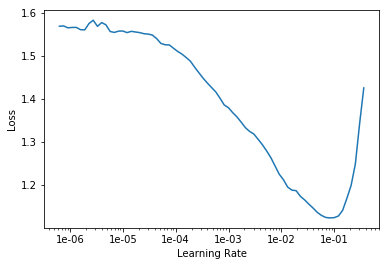

In [38]:
learn2.lr_find()
learn2.recorder.plot()

In [39]:
lr = 1e-3
learn2.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,1.454966,0.941801,0.432749,0.567251,00:05
2,1.193178,0.756268,0.280702,0.719298,00:04
3,0.995274,0.798566,0.333333,0.666667,00:04
4,0.867406,0.799066,0.304094,0.695906,00:04
5,0.783674,0.781964,0.292398,0.707602,00:04
6,0.699923,0.761304,0.292398,0.707602,00:04
7,0.619877,0.733153,0.298246,0.701754,00:04
8,0.570856,0.753959,0.280702,0.719298,00:04
9,0.520569,0.765536,0.286550,0.713450,00:04
10,0.486196,0.757188,0.292398,0.707602,00:04


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


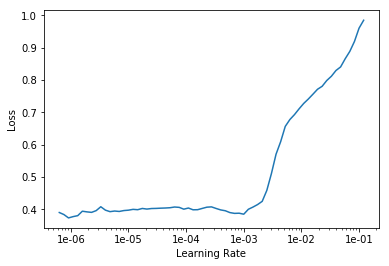

In [41]:
learn2.unfreeze()
learn2.lr_find()
learn2.recorder.plot()

In [43]:
learn2.fit_one_cycle(8, slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.420725,0.753400,0.286550,0.713450,00:05
2,0.385980,0.746986,0.286550,0.713450,00:06
3,0.355011,0.703073,0.245614,0.754386,00:05
4,0.324096,0.687601,0.245614,0.754386,00:06
5,0.293054,0.707399,0.239766,0.760234,00:06
6,0.263072,0.722813,0.251462,0.748538,00:06
7,0.238259,0.714940,0.263158,0.736842,00:05
8,0.230183,0.712054,0.251462,0.748538,00:05


In [44]:
learn2.fit_one_cycle(6, slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.167263,0.713483,0.263158,0.736842,00:05
2,0.184611,0.710563,0.263158,0.736842,00:05
3,0.179408,0.714168,0.269006,0.730994,00:05
4,0.181517,0.711361,0.257310,0.742690,00:06
5,0.182623,0.711130,0.263158,0.736842,00:05
6,0.178194,0.714902,0.280702,0.719298,00:05


In [45]:
log_preds, y = learn2.TTA()
prob = np.exp(log_preds)
accuracy(log_preds, y)

tensor(0.7661)

In [50]:
data3 = ImageDataBunch.from_folder(path/'data2a','training','validation',ds_tfms=tfms, bs=64, size=762).normalize(imagenet_stats)

In [51]:
learn3 = create_cnn(data3, models.resnet18, pretrained=True, metrics=[error_rate, accuracy])
learn3.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


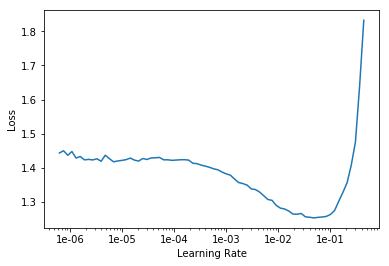

In [52]:
learn3.lr_find()
learn3.recorder.plot()

In [53]:
lr = 6.5e-3
learn2.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.155774,1.026126,0.263158,0.736842,00:06
2,0.281606,2.250251,0.444444,0.555556,00:06
3,0.550733,3.230955,0.637427,0.362573,00:06
4,0.590965,0.807783,0.298246,0.701754,00:06
5,0.551719,1.018635,0.362573,0.637427,00:06
6,0.482721,0.711658,0.280702,0.719298,00:06
7,0.408936,0.989989,0.263158,0.736842,00:06
8,0.349947,0.742374,0.239766,0.760234,00:06
9,0.283902,0.734766,0.257310,0.742690,00:06
10,0.232200,0.711894,0.245614,0.754386,00:06


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


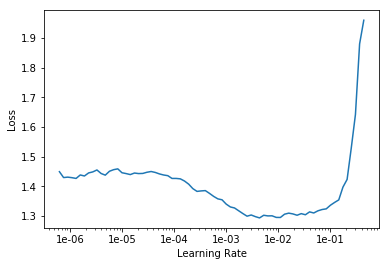

In [54]:
learn3.unfreeze()
learn3.lr_find()
learn3.recorder.plot()

In [59]:
learn3.fit_one_cycle(9, slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.415056,0.789400,0.315789,0.684211,00:25
2,0.400462,0.874306,0.304094,0.695906,00:25
3,0.376431,0.995398,0.280702,0.719298,00:24
4,0.374492,1.556420,0.438596,0.561404,00:24
5,0.353487,1.080855,0.315789,0.684211,00:24
6,0.311947,0.895419,0.304094,0.695906,00:25
7,0.272735,0.901596,0.251462,0.748538,00:24
8,0.234285,0.872280,0.239766,0.760234,00:24
9,0.205227,0.858884,0.251462,0.748538,00:25
